<a href="https://colab.research.google.com/github/solevillar/scGeneFit-python/blob/master/scGeneFit_functional_groups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scGeneFit import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Definition of functional groups
f_groups={0:[[0,0], [1,0], [0,1], [1,1]], 1: [[2],[3]], 2: [[0,0], [0,2], [2,0], [2,2]] }

cell_types_aux=[ [s for s in range(len(f_groups[i]))] for i in f_groups.keys()]
all_cell_types=list(itertools.product(*cell_types_aux))

In [0]:
def create_data(f_groups, cell_types, sigma, n, repeat):
  aux=list(f_groups.keys())
  data=np.zeros( (0, sum([len(f_groups[aux[i]][0])*repeat[i] for i in range(len(aux))]) ))
  for cell in cell_types:
    expression=np.zeros((n, 0))
    for t in range(len(cell)):
      mean=f_groups[t][cell[t]]
      mean=np.concatenate([[mean[i]]*repeat[t] for i in range(len(mean))])
      expression=np.concatenate([expression, np.random.multivariate_normal(mean, sigma*np.identity(len(mean)), size=n)], axis=1)
    data=np.concatenate([data, expression])
  labels=np.concatenate([[i]*n for i in range(len(cell_types))])
  return data,labels

Text(0, 0.5, 'synthetic cells')

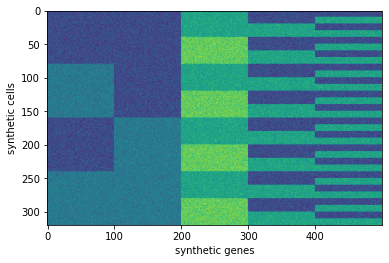

In [43]:
#display all possible cell types
n=10 #10 cells per class
repeat= [100,100,100] #each type of gene appears 100 times (for visualization purposes)
sc_gene, sc_labels=create_data(f_groups, all_cell_types, 0.1, n, repeat)
plt.imshow(sc_gene)
plt.xlabel('synthetic genes')
plt.ylabel('synthetic cells')

Text(0, 0.5, 'synthetic cells')

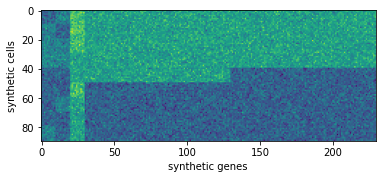

In [44]:
#display data example with 9 classes and 5 relevant markers
cell_types=[(2,1,3), (1,1,3), (3,1,3), (3,0,3), (0,0,2), (0,1,0), (2,0,0), (0,0,0), (1,0,0)]
sc_gene, sc_labels=create_data(f_groups, cell_types, 0.5, n, [10,10,100])
plt.imshow(sc_gene)
plt.xlabel('synthetic genes')
plt.ylabel('synthetic cells')

In [0]:
#create data
X_train, y_train=create_data(f_groups, cell_types, 0.1, n, [10,10,100])
X_test, y_test=create_data(f_groups, cell_types, 0.1, n, [10,10,100])

In [48]:
#obtain markers
#one vs all:
[markers_ova, scores]=one_vs_all_selection(X_train,y_train)

#scGeneFit
m_range=range(2,10)
markers_lp=[]
for m in m_range:
  markers_lp= markers_lp + [get_markers(X_train, y_train, m)]

Solving a linear program with 230 variables and 720 constraints
Time elapsed: 4.0512306690216064 seconds
Solving a linear program with 230 variables and 720 constraints
Time elapsed: 3.9157567024230957 seconds
Solving a linear program with 230 variables and 720 constraints
Time elapsed: 4.026347637176514 seconds
Solving a linear program with 230 variables and 720 constraints
Time elapsed: 3.7360033988952637 seconds
Solving a linear program with 230 variables and 720 constraints
Time elapsed: 3.6040635108947754 seconds
Solving a linear program with 230 variables and 720 constraints
Time elapsed: 3.4141061305999756 seconds
Solving a linear program with 230 variables and 720 constraints
Time elapsed: 3.3915624618530273 seconds
Solving a linear program with 230 variables and 720 constraints
Time elapsed: 2.8315558433532715 seconds
Solving a linear program with 230 variables and 720 constraints
Time elapsed: 2.1763558387756348 seconds
Solving a linear program with 230 variables and 720 cons

0.4888888888888889
[0.28888888888888886, 0.6555555555555556, 0.7, 0.7777777777777778, 0.8333333333333334, 0.8111111111111111, 0.8222222222222222, 0.8555555555555555, 0.8666666666666667, 0.8444444444444444, 0.8333333333333334, 0.8444444444444444, 0.8444444444444444, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8777777777777778, 0.8666666666666667]


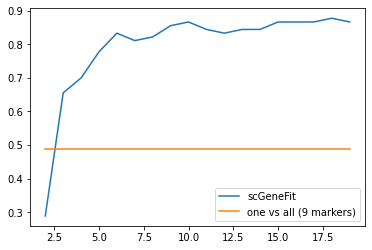

In [49]:
#evaluate classification performance
#train a classifier to evaluate performance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
clf=KNeighborsClassifier(5)
clf=RandomForestClassifier()

def performance(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)
#one vs all
one_vs_all_accuracy=performance(X_train[:,markers_ova], y_train, X_test[:,markers_ova], y_test, clf)
print(one_vs_all_accuracy)
#scGeneFit
l=[]
for markers in markers_lp:
  l=l+[performance(X_train[:,markers], y_train, X_test[:,markers], y_test, clf)]
print(l)

#plot
plt.plot(m_range, l)+plt.plot(m_range,[one_vs_all_accuracy for i in l])
plt.legend(["scGeneFit", "one vs all (9 markers)"])